# PROJET SPEED DATING - LISE GNOS

In this project I chose to focus on the way people's perception is affected by their speed dating experience.

In [29]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

pd.set_option('display.max_columns', 220)

In [46]:
df = pd.read_csv('Speed Dating Data.csv', encoding='iso-8859-1')

# 1) Some statistics to describe the dataset

In [47]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [48]:
df.shape

(8378, 195)

In [49]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [50]:
# Number of missing values for each feature
df.isnull().sum().to_frame().T

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,0,10,0,158,0,104,73,89,89,89,98,107,129,0,212,287,306,360,722,1076,250,318,385,95,63,82,3464,5245,4795,63,79,79,79,1064,4099,79,97,79,89,138,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,101,6578,79,79,79,89,99,121,1889,1889,1889,1889,1889,1911,79,79,79,79,89,89,105,105,105,105,105,3472,3472,3472,3472,3472,0,202,277,296,350,712,1067,240,309,375,1173,4282,4282,4282,4282,4282,4282,4378,4378,4378,4378,4378,915,915,945,6394,6423,6394,6394,6423,6404,933,915,915,915,915,915,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,915,915,915,915,915,4001,4001,4001,4001,4001,4404,4404,4404,6882,7710,4404,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362,6362,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,6362,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


There are a lot of missing values for the answers of some questionnaries (towards the last columns).

In [51]:
df['gender'].unique()

array([0, 1])

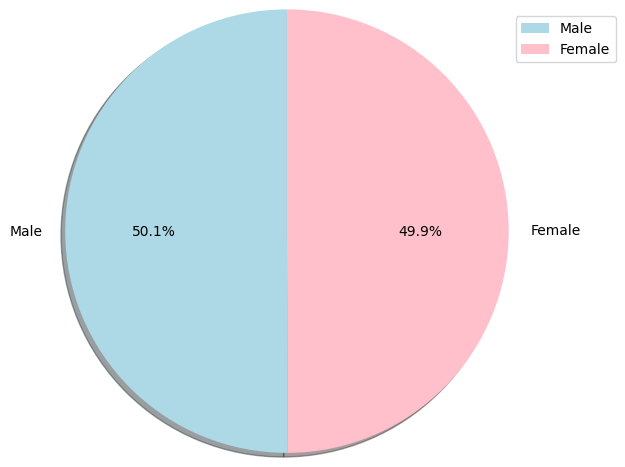

In [52]:
# Distribution between male and female

genders = df['gender'].apply(lambda x: 
                               "Female" if x==0 
                               else "Male" if x == 1
                               else "Missing")
df_pie = genders.value_counts()

plt.figure()
plt.pie(df_pie.values, labels=df_pie.index,
       autopct='%1.1f%%',
        colors = ['lightblue', 'pink'],
       shadow=True, 
       startangle=90,
       radius=1.5
       )
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

The repartition between male and female is totally equal.

In [92]:
# Distribution of ages

df_temp = df.groupby(by = ['iid']).mean(numeric_only = True)

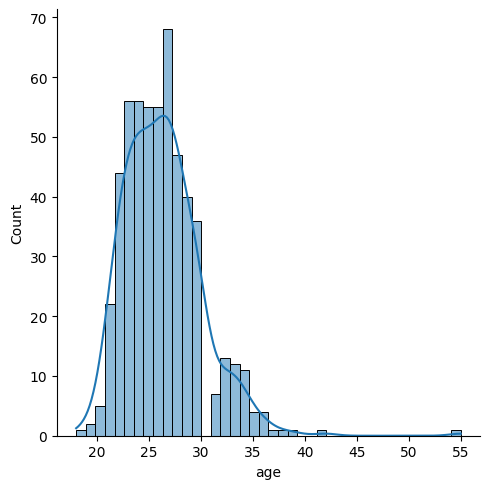

In [93]:
sns.displot(data=df_temp, x='age', kde=True, bins=40)

<AxesSubplot: xlabel='age'>

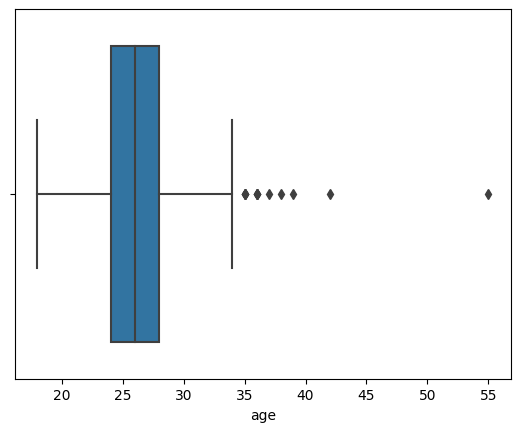

In [94]:
sns.boxplot(data=df_temp, x='age')

Ages are note very well distributed, the gaussian curve is skewed. I choose to keep only ages between 18 and 34 in order to have a good representativeness.

In [95]:
# Keeping ages between 18 and 34 (both participants and partners)

mask = (df['age'] > 17) & (df['age'] < 35) & (df['age_o'] > 17) & (df['age_o'] < 35)
df1 = df.loc[mask,:]
df1.shape

(7844, 195)

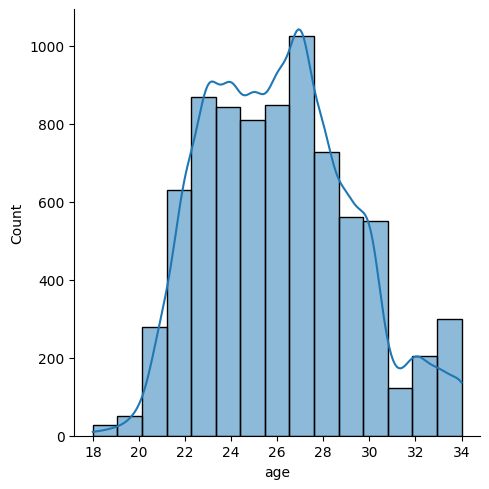

In [96]:
# Check new age distribution

df_temp = df1.groupby(by = ['iid']).mean(numeric_only = True)
sns.displot(data=df1, x='age', kde=True, bins=15)

I choose to focus on 2 topics :
First, has the amount of choices people have an influence on speed dating results ?
Second, how does speed dating affect the way people perceive themselves ?

# Topic 1 : the amount of choices
The dataset contains the column 'condtn' (1 = limited choice and 2 = extensive choice). Basically, the choice is limited when people meet about 10 potential partners during one wave. The choice is extensive when they meet about 20 people (twice as much).

In [86]:
# Calculate percentage of matches towards number of partners met

df_temp = df1.groupby(by = ['iid']).agg({'match':['sum'], 'round':'first'})
df_temp.columns = df_temp.columns.droplevel(-1) # remove double header for sum and first
df_temp.head()

,match,round
iid,,
1,4,10
2,2,10
3,0,10
4,2,10
5,2,10


In [87]:
df_temp['percentage'] = df_temp['match'] / df_temp['round']
df_temp.head()

,match,round,percentage
iid,,,
1,4,10,0.4
2,2,10,0.2
3,0,10,0.0
4,2,10,0.2
5,2,10,0.2


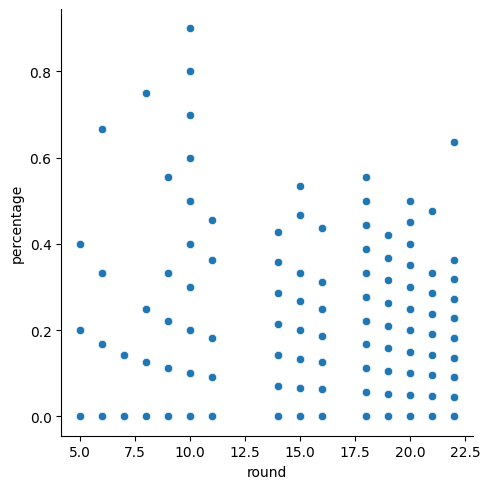

In [90]:
sns.relplot(data=df_temp, x='round', y='percentage')

# Topic 2 : how does speed dating affect the way people perceive themselves ?

Let's study the evolution of people's own perception troughout the speed dating process.
To do that, people have answered the following questions : "How do you think you measure up ?" and "Your opinion of your own attributes ?" at different times : 1-before the event, 2-halfway through the event, 3-the day after the event, 4-3/4 weeks later. Phase 4 is missing lots of values, so we will focus only on the first 3 phases.
For all the 3 phases, people have scored their own attributes on a scale of 1 to 10 (1=awful, 10=great).

In [99]:
# Plotting the way people perceive themselves throughout the 3 phases : features attr3_1, attr3_s, attr3_2 for 'attractive' and so on for all the attributes

df_temp = df1.groupby(by = ['iid']).mean(numeric_only = True)
df_temp.sample(10)

,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
159,2.0,1.0,4.0,2.0,7.0,16.0,8.800000,8.0,8.200000,8.733333,149.733333,0.133333,0.421333,0.600000,27.400000,2.600000,13.376667,17.987333,18.888000,17.712000,17.175333,14.860000,0.133333,4.066667,7.200000,7.866667,5.733333,7.166667,4.461538,4.933333,5.071429,2.000000,28.0,10.0,2.0,7.0,2.0,1.0,6.0,2.0,2.0,7.0,7.0,6.0,9.0,9.0,8.0,6.0,4.0,5.0,8.0,7.0,7.0,9.0,8.0,9.0,7.0,2.0,6.0,NaN,15.91,20.45,20.45,20.45,11.36,11.36,8.0,8.0,6.0,7.0,2.0,5.0,14.81,18.52,18.52,16.67,14.81,16.67,5.0,9.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,0.600000,7.000000,7.733333,7.133333,6.333333,6.250000,5.400000,6.533333,5.000000,0.000000,3.0,17.02,21.28,19.15,14.89,14.89,12.77,6.0,9.0,9.0,8.0,8.0,8.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,16.67,18.75,18.75,16.67,14.58,14.58,9.0,8.0,6.0,9.0,5.0,7.0,15.38,19.23,17.31,15.38,17.31,15.38,7.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,14.29,18.37,18.37,18.37,16.33,14.29,NaN,NaN,NaN,NaN,NaN,NaN,9.0,7.0,7.0,8.0,7.0,8.0,9.0,9.0,7.0,8.0,9.0,NaN,6.0,12.0,9.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN
222,9.0,1.0,18.0,2.0,9.0,20.0,10.500000,12.0,10.500000,10.500000,203.500000,0.000000,0.254000,0.600000,25.600000,2.350000,15.675500,17.444000,18.651500,17.550000,16.153000,14.528000,0.050000,3.200000,7.444444,8.157895,4.157895,5.833333,4.062500,4.368421,4.529412,1.894737,27.0,2.0,2.0,8.0,3.0,2.0,6.0,3.0,2.0,5.0,1.0,6.0,8.0,10.0,9.0,6.0,4.0,7.0,9.0,1.0,9.0,9.0,10.0,8.0,3.0,1.0,3.0,NaN,9.52,19.05,23.81,19.05,4.76,23.81,10.0,6.0,2.0,9.0,3.0,8.0,16.67,21.43,7.14,21.43,14.29,19.05,4.0,9.0,7.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.600000,7.000000,5.150000,6.150000,5.450000,5.400000,3.900000,6.050000,5.250000,1.900000,NaN,16.28,20.93,23.26,13.95,4.65,20.93,5.0,9.0,7.0,6.0,3.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,15.00,20.00,22.50,17.50,2.50,22.50,10.0,6.0,2.0,10.0,3.0,6.0,18.37,16.33,12.24,20.41,16.33,16.33,5.0,9.0,9.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2.0,1.0,4.0,1.0,1.0,10.0,5.500000,NaN,5.500000,5.500000,5.500000,0.200000,0.155000,0.600000,23.600000,3.000000,20.409000,14.318000,23.227000,22.318000,10.318000,9.409000,0.400000,7.100000,6.600000,7.100000,6.700000,6.900000,6.111111,6.900000,4.200000,1.500000,22.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,7.0,9.0,8.0,7.0,6.0,3.0,3.0,5.0,6.0,6.0,4.0,7.0,7.0,9.0,5.0,5.0,7.0,20.0,60.00,0.00,0.00,40.00,0.00,0.00,NaN,NaN,

In [102]:
df_temp_median = df_temp.median()

In [107]:
categories = ['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr3_1'], df_temp_median['sinc3_1'], df_temp_median['intel3_1'], df_temp_median['fun3_1'], df_temp_median['amb3_1']],
      theta=categories,
      fill='toself',
      name='Before the event'
))
fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr3_s'], df_temp_median['sinc3_s'], df_temp_median['intel3_s'], df_temp_median['fun3_s'], df_temp_median['amb3_s']],
      theta=categories,
      fill='toself',
      name='Halfway through the event'
))

fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr3_2'], df_temp_median['sinc3_2'], df_temp_median['intel3_2'], df_temp_median['fun3_2'], df_temp_median['amb3_2']],
      theta=categories,
      fill='toself',
      name='The day after the event'
))


fig.update_layout(
    title=go.layout.Title(text='People\'s own perception troughout the speed dating process'),
    polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
    showlegend=True
)

fig.show()

In [108]:
# Plotting the way people think the others perceive them throughout the 2 phases : features attr5_1, attr5_2 for 'attractive' and so on for all the attributes

categories = ['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr5_1'], df_temp_median['sinc5_1'], df_temp_median['intel5_1'], df_temp_median['fun5_1'], df_temp_median['amb5_1']],
      theta=categories,
      fill='toself',
      name='Before the event'
))

fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr5_2'], df_temp_median['sinc5_2'], df_temp_median['intel5_2'], df_temp_median['fun5_2'], df_temp_median['amb5_2']],
      theta=categories,
      fill='toself',
      name='The day after the event'
))


fig.update_layout(
    title=go.layout.Title(text='The way people think the others perceive them troughout the speed dating process'),
    polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
    showlegend=True
)

fig.show()

The previous results are interesting : people do not change the perception of themselves at all throughout the speed dating process. However, the way people think the others perceive them evolves for 2 attributes : after the speed dating, people think that they are seen by others less fun and ambitious.
Let's investigate if this loss of confidence in themselves affects the way they score their partners.

In [111]:
# Plotting the way people are really rated by their partners : features attr_o for 'attractive' and so on for all the attributes

categories = ['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr_o'], df_temp_median['sinc_o'], df_temp_median['intel_o'], df_temp_median['fun_o'], df_temp_median['amb_o']],
      theta=categories,
      fill='toself',
      name=' '
))

fig.update_layout(
    title=go.layout.Title(text='The way people are really rated by their partners'),
    polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
    showlegend=False
)

fig.show()

In [ ]:
# la perception correspond-elle à ce qu'ils ont été notés ?

Storytelling : do people see themselves in the same way as other people see them ?
Bien vérifier à chaque fois que la somme = 100
décalage entre les attributs pour un date et ce que l'on recherche vraiment chez l'autre ?
y a-t-il une station number plus favorable ?
est-ce que les personnes qui ont l'habitude des dates sont plus justes sur la perception d'elles-mêmes ?
différence de perception entre homme et femme ?
plus de matchs if samerace ?
faire la disribution de l'age => prendre between 21 and 34
vérifier combien de fois les personnes ont fait du speed dating, ce qui peut influencer aussi leur perception
faire une animation plotly express pout montrer l'évolution de la perception au cours des étapes

array([0, 1])

In [9]:
df['age'].isna().sum()

95

In [10]:
df_temp = df.groupby(by = ['iid', 'age', 'gender', 'wave']).sum()

/tmp/ipykernel_8488/314374431.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df.groupby(by = ['iid', 'age', 'gender', 'wave']).sum()


In [11]:
df_temp.head()
#vérifier en faisant groupby si on a bcp de valeurs manquantes en étape 3 ou pas

,,,,id,idg,condtn,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,age,gender,wave,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,21.0,0,1,10.0,10,10,100,70,0.0,55,55,155.0,4,2.67,1,252.0,23.0,442.33,79.11,165.11,169.11,45.11,99.22,5,67.0,74.0,80.0,72.0,80.0,71.0,68.5,57.0,19.0,10.0,40.0,20.0,40.0,20.0,70.0,10.0,0.0,90.0,20.0,80.0,90.0,10.0,10.0,50.0,10.0,50.0,60.0,90.0,10.0,100.0,100.0,90.0,80.0,10.0,30.0,20.0,150.0,200.0,200.0,150.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,200.0,150.0,200.0,50.0,50.0,60.0,80.0,80.0,80.0,70.0,0.0,0.0,0.0,0.0,0.0,8,57.0,73.0,73.0,68.0,63.0,65.0,65.0,53.0,16.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,194.4,166.7,138.9,222.2,111.1,166.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,70.0,80.0,70.0,60.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,150.0,200.0,200.0,150.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,70.0,70.0,70.0,70.0,0.0,0.0,0.0,0.0,0.0
2,24.0,0,1,20.0,30,10,100,30,0.0,55,55,155.0,2,2.58,8,252.0,23.0,442.33,79.11,165.11,169.11,45.11,99.22,6,77.0,71.0,79.0,75.0,75.0,65.0,76.0,55.0,19.0,10.0,20.0,20.0,50.0,10.0,50.0,10.0,0.0,30.0,20.0,70.0,100.0,80.0,60.0,30.0,50.0,80.0,100.0,10.0,90.0,80.0,70.0,80.0,30.0,10.0,40.0,50.0,450.0,50.0,250.0,200.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,650.0,0.0,100.0,250.0,0.0,0.0,70.0,50.0,100.0,80.0,30.0,0.0,0.0,0.0,0.0,0.0,4,64.0,70.0,77.0,61.0,65.0,57.0,66.0,59.0,19.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.2,189.2,216.2,270.3,54.1,81.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,60.0,80.0,90.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,50.0,400.0,150.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,60.0,90.0,90.0,40.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0,1,30.0,50,10,100,90,0.0,55,55,155.0,0,-1.36,8,252.0,23.0,442.33,79.11,165.11,169.11,45.11,99.22,5,65.0,71.0,73.0,62.0,64.0,54.0,60.0,45.0,19.0,20.0,20.0,80.0,40.0,60.0,30.0,10.0,0.0,30.0,80.0,70.0,80.0,50.0,50.0,80.0,40.0,50.0,70.0,80.0,70.0,70.0,70.0,50.0,80.0,70.0,40.0,20.0,350.0,100.0,350.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,200.0,300.0,0.0,0.0,80.0,90.0,80.0,90.0,80.0,0.0,0.0,0.0,0.0,0.0,0,81.0,86.0,94.0,77.0,88.0,81.0,82.0,56.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [12]:
df_temp.isnull().sum().to_frame().T

,id,idg,condtn,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


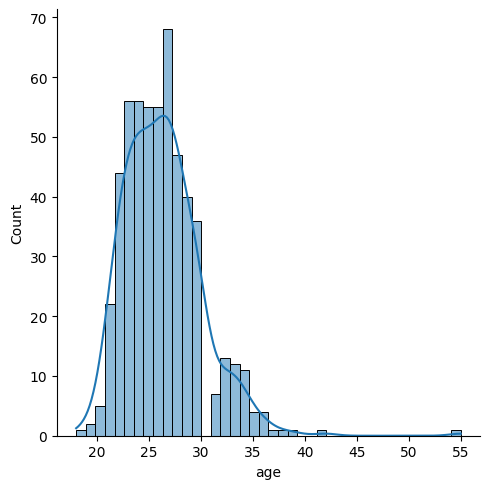

In [13]:
sns.displot(data=df_temp, x='age', kde=True, bins=40)

In [48]:
#sns.catplot(y ='match', x="age", kind = "box", data=df_temp)
#faire en violon

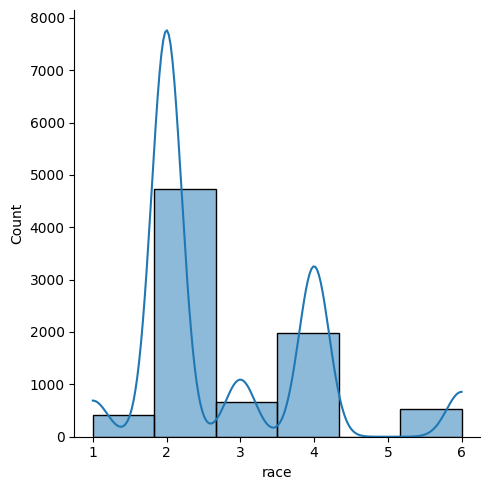

In [14]:
sns.displot(data=df, x='race', kde=True, bins=6)

In [15]:
df[['match', 'field_cd']].corr()

,match,field_cd
match,1.000000,-0.024641
field_cd,-0.024641,1.000000


In [16]:
df['match'].unique()

array([0, 1])

In [17]:
dc = df.iloc[:,:100]

In [18]:
dc.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

In [19]:
corr = dc.corr()

/tmp/ipykernel_8488/786906064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dc.corr()


In [20]:
abs(corr['match']).sort_values(ascending = False)

match      1.000000
dec_o      0.522326
dec        0.521943
like_o     0.305853
fun_o      0.277700
             ...   
id         0.000770
idg        0.000544
gender     0.000530
theater    0.000087
amb2_1     0.000028
Name: match, Length: 92, dtype: float64

In [21]:
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(corr, annot=True, ax=ax)

In [22]:
df['like_o'].head()

0     7.0
1     8.0
2    10.0
3     7.0
4     8.0
Name: like_o, dtype: float64

What types of skills make a match most plausible? Let's have a look at the evaluation of skills in the scorecard filled out by subjects after each "date" during the event :

In [23]:
df['attr'].head()

0    6.0
1    7.0
2    5.0
3    7.0
4    5.0
Name: attr, dtype: float64

In [24]:
dscore = df[['match', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o']]
dscore.head()
# /!\ dec_o et attr_o viennent du partenaire, à modifier

,match,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0
1,0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0
2,1,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
3,1,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0
4,1,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0


match      1.000000
dec_o      0.522326
like_o     0.305853
fun_o      0.277700
shar_o     0.270840
attr_o     0.260837
prob_o     0.255574
intel_o    0.169448
sinc_o     0.164523
amb_o      0.139927
met_o      0.106569
Name: match, dtype: float64

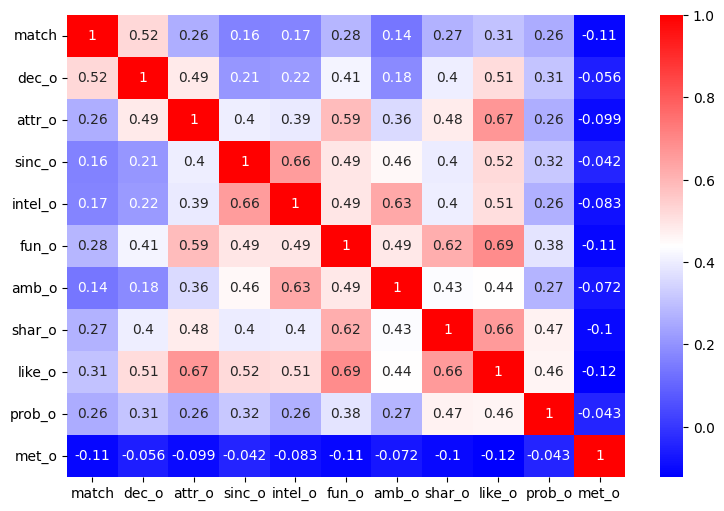

In [25]:
corr = dscore.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax, cmap='bwr')
abs(corr['match']).sort_values(ascending = False)

The match is first correlated to the decision of the subjects. It is quite obvious because the match happens when the 2 subjects both take a yes decision. In the same way, the like_o parameter represents an overall feeling of the person, which is very important for the decision.
Apart from that, the most important skills for a match are : Fun, Shared Interests/Hobbies, Attractive, much before Sincere, Intelligent and Ambitious. It is important to notice that the prob_o parameter plays a great role for a match. It corresponds to : How probable do you think it is that this person will say 'yes' for you? It seems that the subjects don't dare to like a person who could potentially don't like them. Let's try to verify this hypothesis !

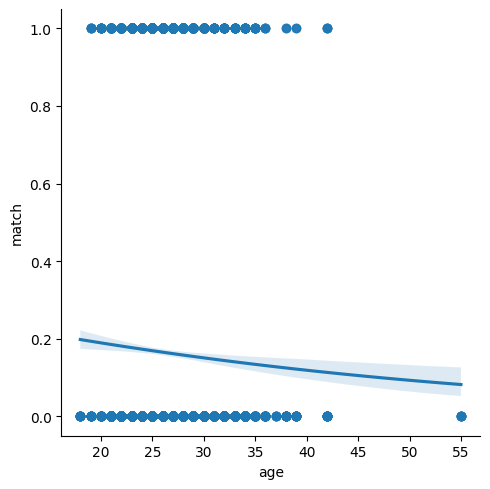

In [28]:
sns.lmplot(x="age", y="match", data= df, logistic = True)